## Select an Area

In [1]:
import folium
import pandas as pd
import json
import random
from shapely.geometry import Polygon
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import geopandas as gpd

center=(-22.6,117.3)
    
wms_warox = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:waroxi_wa_4326_bed',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSWA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:2_5m_interpgeop15_4326',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSWA',
    name='geology'

)
m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_warox)   


m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m

Label(value='')

Map(center=[-22.6, 117.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [2]:
new_poly=GeoJSON(data=dc.last_draw)
new_poly=str(new_poly)

if("'geometry': None" in new_poly):
    raise NameError('map2loop error: No rectangle selected')
new_poly=new_poly.rsplit("'coordinates': ", 1)[1]
new_poly=new_poly.replace('[[[','').replace('[','').replace(']]]}})','').replace('],','').replace(',','').split(" ")
longs=new_poly[0::2]
lats=new_poly[1::2]
minlong=float(min(longs))
maxlong=float(max(longs))
minlat=float(max(lats)) #ignores sign
maxlat=float(min(lats)) #ignores sign

bounds=(minlong,maxlong,minlat,maxlat)
src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
dst_crs = "epsg:28350" # coordinate system for example data

lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
mbbox = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 
bbox=mbbox.total_bounds
st_bbox=[bbox[0],bbox[1],bbox[2],bbox[3]]
print(src_crs,mbbox.total_bounds)
mbbox=mbbox.to_crs(dst_crs)
print(dst_crs,mbbox.total_bounds)

epsg:4326 [112.63139  -35.646584 129.597805 -13.12014 ]
epsg:28350 [  26076.10424831 5981294.94616617 1875496.90450535 8545471.31531568]


## Map2Loop

In [ ]:
import os
from map2loop.project import Project

proj = Project(
                loopdata_state="WA"
                )

proj.update_config(
                    out_dir='./wa-part2',
                    overwrite='true',                    
                    bbox_3d={
                         "minx": mbbox.total_bounds[0], #500000,
                         "miny": mbbox.total_bounds[1], #7490000,
                         "maxx": mbbox.total_bounds[2], #545000,
                         "maxy": mbbox.total_bounds[3], #7520000,
                         "base": -3200,
                         "top": 1200,
                     },
                    proj_crs={'init': 'EPSG:28350'},
                    quiet='no-figures'
                  )

proj.run()


 orientations layer  metadata
--------------------
    bbox [ 270676.31661285 6211613.9039821  1789809.28600034 8455028.62627146]
    CRS None
    # items 25892
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [  90196.43548043 6106193.67975246 1799130.14044623 8464416.97175189]
    CRS None
    # items 18065
    Data types ['MultiPolygon']

 fold layer  metadata
--------------------
    bbox [  94006.77449383 6118001.58399993 1794760.54912171 8416294.80023068]
    CRS None
    # items 17271
    Data types ['LineString']

 fault layer  metadata
--------------------
    bbox [ 160522.35461601 6118001.58399993 1794760.54912171 8416294.80023068]
    CRS +init=epsg:28350 +type=crs
    # items 15204
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    bbox [ 133718.6043864  6113981.02165357 1794203.62271834 8437737.27282097]
    CRS None
    # items 39063
    Data types ['Point']

Warnings:
     15424 NaN/blank found in column "su

  0%|          | 0/100 [00:00<?, ?it/s]

Input graphic saved to: ./wa-part2/tmp/input-fig.png
Generating topology analyser input...
18065  polygons


  0%|          | 0/100 [00:00<?, ?it/s]

Generating topology analyser input...
18  polygons
Successful parameter load
Output directory created at: ./wa-part/graph/
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:./wa-part/graph/
Done.
Generating topology graph display and unit groups...
0    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
1    'Hamersley Group', 'anchor': 'n', 'fontStyle': 'bold'
2    'Brockman Iron Formation'
3    'Bunjinah Formation'
4    'Fortescue Group'
5    'Jeerinah Formation'
6    'Marra Mamba Iron Formation'
7    'Mount McRae Shale and Mount Sylvia Formation'
8    'Wittenoom Formation'
Topology figure saved to ./wa-part/tmp/topology-fig.png


 10%|█         | 10/100 [00:01<00:09,  9.50it/s]

Done
Fetching DTM...  bbox:117.10490566561315 117.66352951049538 -22.56713597510102 -22.10122793544079
Attempt: 0 

 20%|██        | 20/100 [00:02<00:08,  9.07it/s]

dtm geotif saved as ./wa-part/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./wa-part/dtm/dtm_rp.tif


 30%|███       | 30/100 [00:02<00:06, 11.49it/s]

group choices: 1
dtb and dtb_null set to 0
47 orientations saved to ./wa-part/output/orientations.csv
extra orientations saved as ./wa-part/output//empty_series_orientations.csv


 60%|██████    | 60/100 [00:03<00:02, 14.79it/s]

basal contacts saved allpts= 852 deci_pts= 199
saved as ./wa-part/tmp/all_contacts.csv and ./wa-part/tmp/contacts.csv
basal contacts without faults saved as ./wa-part/tmp/basal_contacts.shp
decimated contacts saved as ./wa-part/output/contacts4.csv
All observations n= 49
groups ['Hamersley Group' 'Fortescue Group'] 
codes ['Brockman Iron Formation' 'Mount McRae Shale and Mount Sylvia Formation'
 'Marra Mamba Iron Formation' 'Wittenoom Formation' 'Bunjinah Formation'
 'Fortescue Group' 'Jeerinah Formation']
----------------------------------------------------------------------------------------------------------------------
Hamersley Group observations n= 35
strike/dip of girdle 192.84189825024893 / 86.55062149263345
----------------------------------------------------------------------------------------------------------------------
Fortescue Group observations n= 14
strike/dip of girdle 190.41376076439855 / 88.16301464915018


 70%|███████   | 70/100 [00:04<00:02, 12.71it/s]

74 59
fault orientations saved as ./wa-part/output/fault_orientations.csv
fault positions saved as ./wa-part/output/faults.csv
fault dimensions saved as ./wa-part/output/fault_dimensions.csv


 90%|█████████ | 90/100 [00:05<00:00, 14.06it/s]

fault displacement estimates saved as ./wa-part/output/fault_displacements3.csv
near-fault orientations saved as ./wa-part/tmp/ex_f_combo_full.csv
near-fault orientations saved as ./wa-part/tmp/ex_f_combo_full.csv
0 Hamersley_Group
1 Fortescue_Group
pluton contacts and orientations saved as:
./wa-part/output/ign_contacts.csv
./wa-part/output/ign_orientations_domes.csv
Propagating dips along contacts...
13
169 points saved to ./wa-part/tmp/raw_contacts.csv
115 thickness estimates saved as ./wa-part/output/formation_thicknesses.csv
['Mount_McRae_Shale_and_Mount_Sylvia_Formation' 'Wittenoom_Formation'
 'Jeerinah_Formation' 'Marra_Mamba_Iron_Formation'] already processed
54 min thickness estimates appended to ./wa-part/output/formation_thicknesses.csv
Mount_McRae_Shale_and_Mount_Sylvia_Formation 172.0 165.3907476710976
Wittenoom_Formation 718.0 751.260752301568
Jeerinah_Formation 343.5 212.32446714362922
Marra_Mamba_Iron_Formation 236.0 368.4215964452583
Brockman_Iron_Formation 211.0 451.2

100%|██████████| 100/100 [00:07<00:00,  7.98it/s]

cycles []


100%|██████████| 100/100 [00:08<00:00, 12.01it/s]


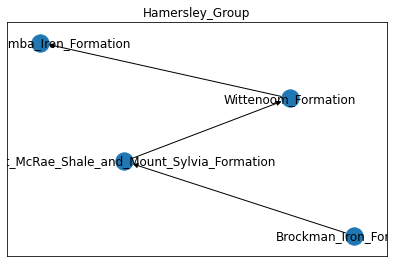

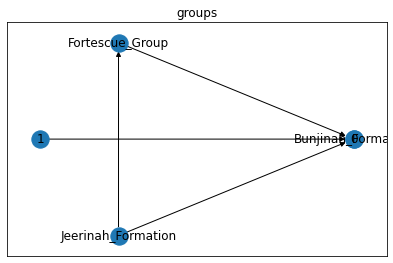

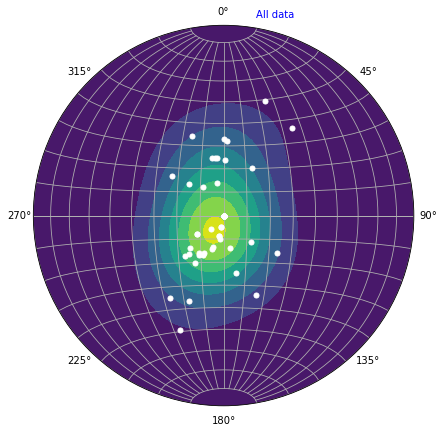

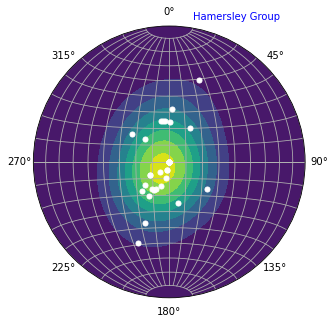

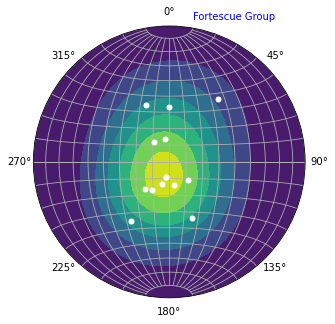

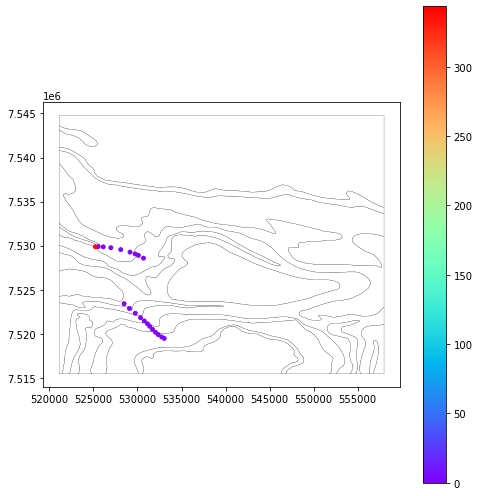

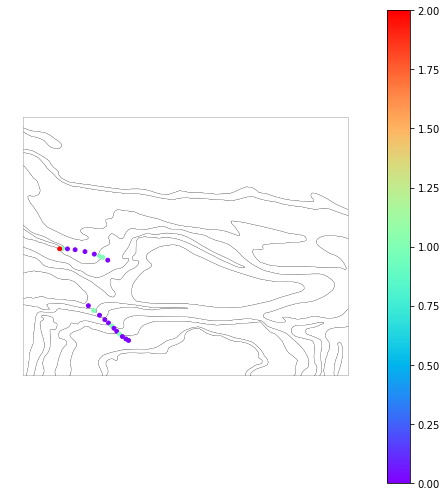

In [4]:
proj.run()

In [4]:
import pickle

with open('wa-part-config.pkl', 'wb') as handle:
    pickle.dump(dict(proj.config.c_l), handle)
    
with open('wa-part-bbox.pkl', 'wb') as handle:
    pickle.dump(dict(proj.config.bbox_3d), handle)
    
with open('wa-part-proj.pkl', 'wb') as handle:
    pickle.dump(proj, handle)

In [5]:
bbox_3d = proj.config.bbox_3d
if(not os.path.exists(proj.config.fault_file_csv)):
    f=open(output_path + '/fault_displacements3.csv','w')
    f.write('X,Y,fname,apparent_displacement,vertical_displacement,downthrow_dir\n')
    f.close()
    f=open(output_path + '/fault_orientations.csv','w')
    f.write('X,Y,Z,DipDirection,dip,DipPolarity,formation\n')
    f.close()
    f=open(output_path + '/faults.csv','w')
    f.write('X,Y,Z,formation\n')
    f.close()
    f=open(output_path + '/fault-fault-relationships.csv','w')
    f.write('fault_id\n')
    f.close()
    f=open(output_path + '/group-fault-relationships.csv','w')
    f.write('group\n')
    f.close()
f=open(proj.config.tmp_path+'bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(bbox_3d['minx'],bbox_3d['miny'],bbox_3d['maxx'],bbox_3d['maxy'],bbox_3d['base'],bbox_3d['top'])
f.write(ostr)
f.close()

## Loop Structural

In [6]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer, MapView
from LoopStructural.visualisation.stratigraphic_column import StratigraphicColumnView

# define parameters for faults - we use the same parameters for all faults
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4,
                'data_region':.2,
                'regularisation':[1,2,1],
                'damp':True,
                'solver':'lu',
#                 overprints:overprints,
                'cpw':2,
                'npw':2}
# define interpolation parameters for stratigraphy
foliation_params = {'interpolatortype':'PLI' , # 'interpolatortype':'PLI',
                    'nelements':1e5,  # how many tetras/voxels
                    'buffer':0.8,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'cpw':2,
                    'npw':2,
                    'damp':True}

model, m2l_data = GeologicalModel.from_map2loop_directory(proj.config.project_path,
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)

Cannot import Surfe
Pyamg not installed using cg instead
Pyamg not installed using cg instead


## Visualisation
LoopStructural models can be viewed using an interactive 3D viewer.

Below is a block diagram showing the stratigraphic units `geological model` and surfaces representing the faults and stratigaphy.  

*Use the check boxes on the left to turn the layers on and off.*


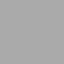

In [7]:
view = LavaVuModelViewer(model)
view.add_model_surfaces(cmap='tab20')
view.nelements =1e6
view.add_model(cmap='tab20')
view.add_data(model['supergroup_0'])
view.interactive()

Fetching DTM...  bbox:116.8070950465275 117.84724271576175 -23.113682053329416 -22.517842852405508
Attempt: 0 dtm geotif saved as ./model-test/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./model-test/dtm/dtm_rp.tif


NameError: name 'MapUtil' is not defined

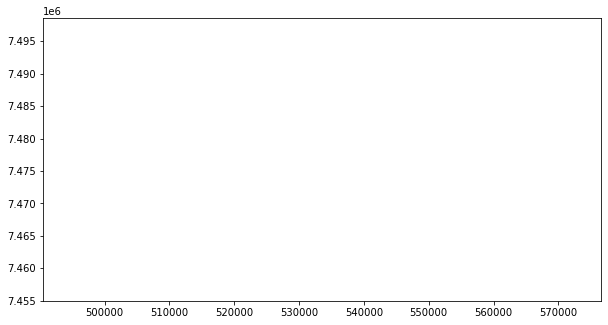

In [8]:
maps =proj.config.geol_clip#geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')

extent=[model.bounding_box[0,0], model.bounding_box[1,0], model.bounding_box[0,1], model.bounding_box[1,1]]
mapview = MapView(model)
proj.config.load_dtm()
geomap = MapUtil(proj.config.bbox_3d,maps,proj.config.dtm)
mapview.nsteps = (200,200)
xy = np.array([mapview.xx
               .flatten(),mapview.yy.flatten()]).T
dtm = geomap.evaluate_dtm_at_points(xy)

In [ ]:
geo_map = geomap.evaluate_geology_at_points(xy)
# dtm[:]=0
model_map = model.evaluate_model(np.vstack([xy.T,dtm]).T)

In [ ]:
plt.rcParams.update({'font.size': 32})
fig3 = plt.figure(constrained_layout=True,figsize=(80,20))
nx = 6
gs = fig3.add_gridspec(5, 2*nx+1)
legend = fig3.add_subplot(gs[:-1, :1])
strike = fig3.add_subplot(gs[-1:,:1])

#add stike symbol
gradient_data = np.array([[0,1.,0]])
t = gradient_data[:, [1, 0]] * np.array([1, -1]).T
n = gradient_data[:, 0:2]
# t *= symb_scale
n *= 0.5
p1 = gradient_data[:, [0, 1]] - t
p2 = gradient_data[:, [0, 1]] + t
# plt.scatter(val[:,0],val[:,1],c='black')
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1], p2[:, 1]], 'black')
p1 = gradient_data[:, [0, 1]]
p2 = gradient_data[:, [0, 1]] + n
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1], p2[:, 1]], 'black')
strike.annotate("Bedding orientation", xy=[0,0],xytext=[1.5,.75],annotation_clip=False,size=20)
strike.set_xlim(-2,2)
# strike.plot()
strike.axis('off')
strike.axis('square')
p1 = gradient_data[:, [0, 1]] - t
p2 = gradient_data[:, [0, 1]] + t
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1]+1.2, p2[:, 1]+1.2], 'black')
strike.annotate("Fault trace", xy=[0,1.2],xytext=[1.5,.75+1.2],annotation_clip=False,size=20)

# f3_ax1.set_title('gs[0, :-2]')
geol_map_ax = fig3.add_subplot(gs[:, nx+1])
model_map_ax = fig3.add_subplot(gs[:, nx+1:])

column_ax = StratigraphicColumnView(model,legend)
geol_map_ax.imshow(geo_map.reshape(mapview.nsteps).T,extent=extent,cmap=proj.config.cmap,origin='lower',vmin=0,vmax=7)
# proj.config.faults_clip.plot(ax=geol_map_ax)
mapview2 = MapView(model,ax=model_map_ax)
mapview2.nsteps=(200,200)
mapview2.add_data(model.features[-1],dip=False,val=False,symb_scale=200)
mapview2.add_model(cmap=proj.config.cmap,z=dtm)
mapview2.add_faults(colors='black')
model_map_ax.imshow(model_map.reshape(mapview.nsteps).T,extent=extent,cmap=proj.config.cmap,origin='lower',vmin=0,vmax=7)

legend.set_title('A. Legend')
geol_map_ax.set_title('B. Geological map')
model_map_ax.set_title('C. Interpolated geological map')